In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
df = pd.read_csv('seattle-weather.csv')

In [3]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,1/1/2012,0.0,12.8,5.0,4.7,drizzle
1,1/2/2012,10.9,10.6,2.8,4.5,rain
2,1/3/2012,0.8,11.7,7.2,2.3,rain
3,1/4/2012,20.3,12.2,5.6,4.7,rain
4,1/5/2012,1.3,8.9,2.8,6.1,rain


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1435 non-null   float64
 2   temp_max       1433 non-null   float64
 3   temp_min       1440 non-null   float64
 4   wind           1442 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [5]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [6]:
warnings.filterwarnings("ignore")

Convert ke DateTime

In [7]:
df['date'] = pd.to_datetime(df['date'])
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [8]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather,day,month,year
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,1,1,2012
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2,1,2012
2,2012-01-03,0.8,11.7,7.2,2.3,rain,3,1,2012
3,2012-01-04,20.3,12.2,5.6,4.7,rain,4,1,2012
4,2012-01-05,1.3,8.9,2.8,6.1,rain,5,1,2012


In [9]:
df.weather.value_counts()

weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64

In [10]:
missing_values = df.isnull().sum()
df.isnull().sum()

date              0
precipitation    26
temp_max         28
temp_min         21
wind             19
weather           0
day               0
month             0
year              0
dtype: int64

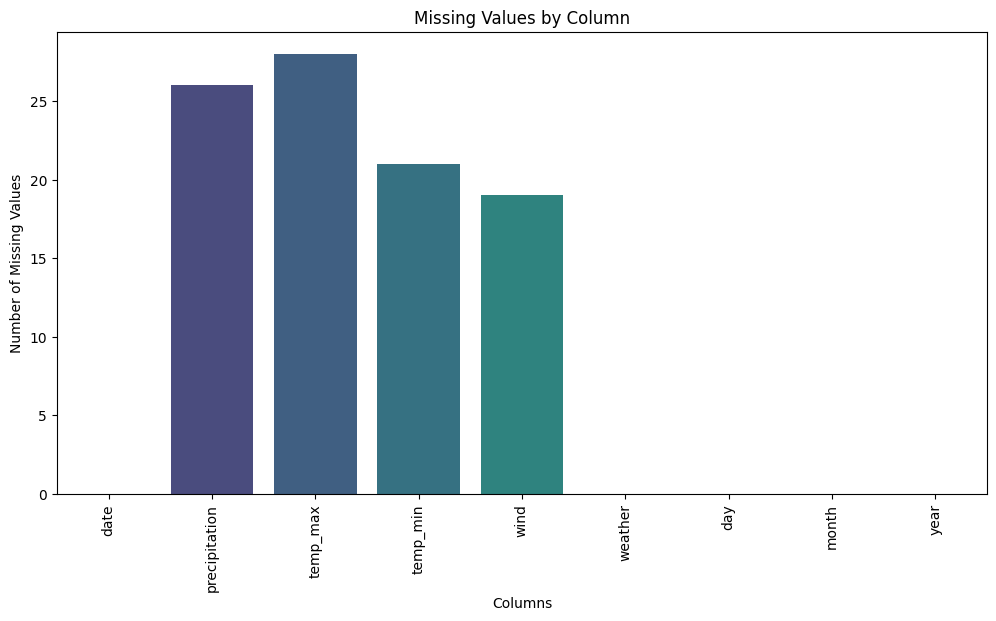

In [11]:
# Create a bar plot to visualize missing values
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.title("Missing Values by Column")
plt.show()

<Axes: xlabel='weather', ylabel='count'>

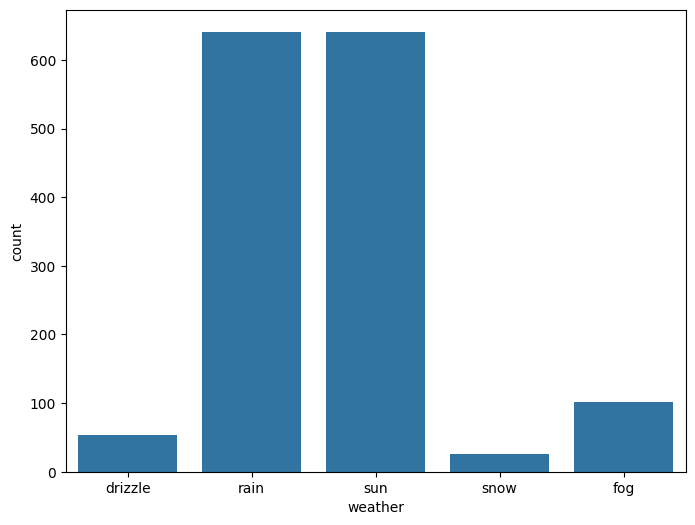

In [12]:
plt.figure(figsize=(8,6))
sns.countplot(data=df,x=df.weather)

<Axes: xlabel='temp_max', ylabel='Count'>

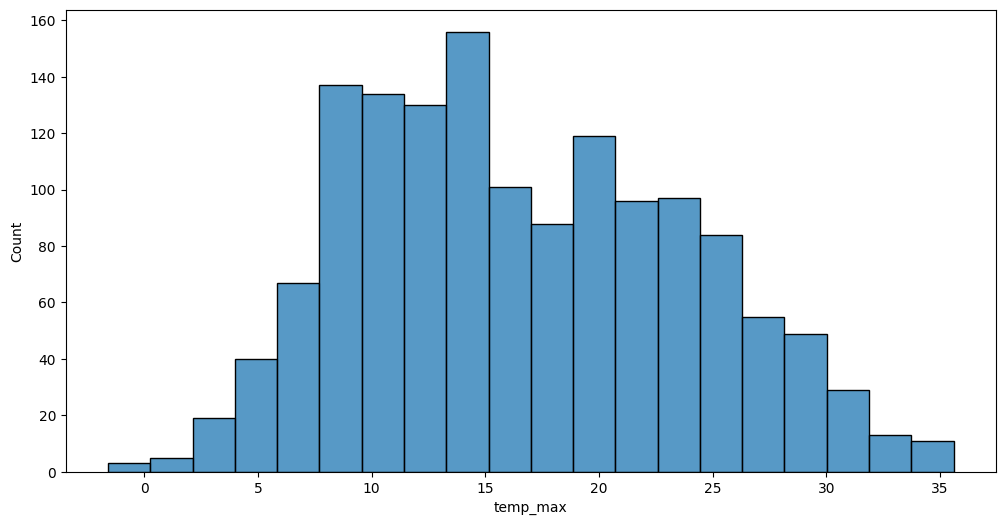

In [13]:
#histogram temperatur Maksimalnya
plt.figure(figsize=(12,6))
sns.histplot(data=df,x=df.temp_max,bins=20)

<Axes: xlabel='temp_min', ylabel='Count'>

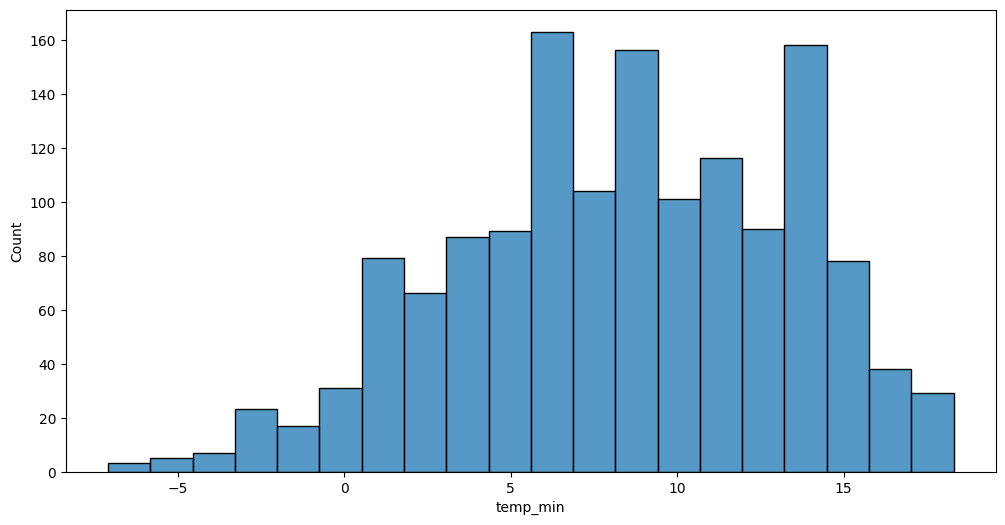

In [14]:
#Histogram Minimal
plt.figure(figsize=(12,6))
sns.histplot(data=df,x=df.temp_min,bins=20)

<Axes: ylabel='count'>

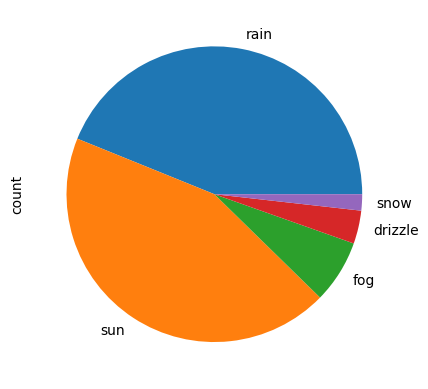

In [15]:
df['weather'].value_counts().plot.pie()

<Axes: ylabel='count'>

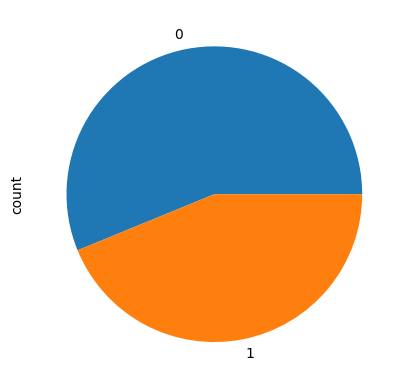

In [16]:
df['is_sunny'] = df['weather'].map(lambda x: 1 if x == 'sun' else 0)
df['is_sunny'].value_counts().plot.pie()

In [17]:
df_time = df[['date', 'is_sunny', 'weather']].copy()
df_time

,date,is_sunny,weather
0,2012-01-01,0,drizzle
1,2012-01-02,0,rain
2,2012-01-03,0,rain
3,2012-01-04,0,rain
4,2012-01-05,0,rain
5,2012-01-06,0,rain
6,2012-01-07,0,rain
7,2012-01-08,1,sun
8,2012-01-09,0,rain
9,2012-01-10,0,rain


In [18]:
df_time['day'] = df_time['date'].dt.day
df_time['month'] = df_time['date'].dt.month
df_time['year'] = df_time['date'].dt.year
df_time['day_of_week'] = df_time['date'].dt.dayofweek

df_time

,date,is_sunny,weather,day,month,year,day_of_week
0,2012-01-01,0,drizzle,1,1,2012,6
1,2012-01-02,0,rain,2,1,2012,0
2,2012-01-03,0,rain,3,1,2012,1
3,2012-01-04,0,rain,4,1,2012,2
4,2012-01-05,0,rain,5,1,2012,3
5,2012-01-06,0,rain,6,1,2012,4
6,2012-01-07,0,rain,7,1,2012,5
7,2012-01-08,1,sun,8,1,2012,6
8,2012-01-09,0,rain,9,1,2012,0
9,2012-01-10,0,rain,10,1,2012,1


<Axes: xlabel='year', ylabel='count'>

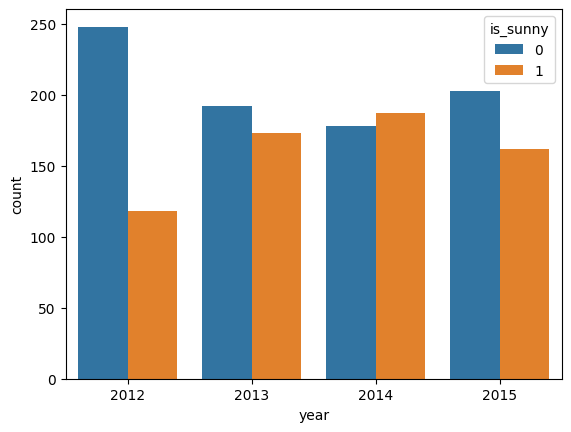

In [19]:
sns.countplot(df_time, x='year', hue='is_sunny')

In [20]:
precipitation_table = df.groupby('weather')['precipitation'].agg(['min', 'max', 'mean']).reset_index()

In [21]:
precipitation_table.T

,0,1,2,3,4
weather,drizzle,fog,rain,snow,sun
min,0.0,0.0,0.0,0.3,0.0
max,0.0,0.0,55.9,23.9,0.0
mean,0.0,0.0,6.605087,8.178947,0.0


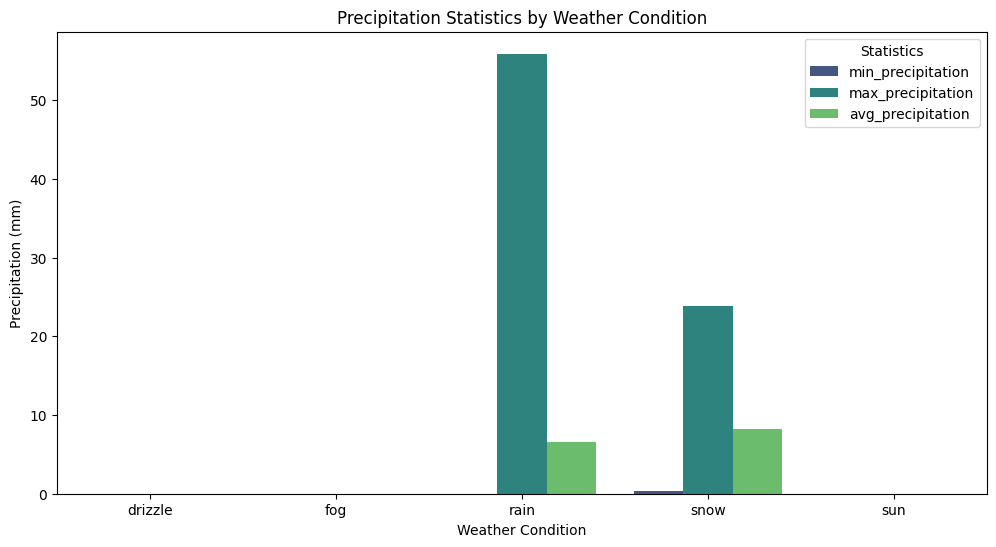

In [22]:
# Untuk membuat nama kolom lebih deskriptif
precipitation_table.columns = ['weather', 'min_precipitation', 'max_precipitation', 'avg_precipitation']
#(Min_precipitation )Nilai terkecil dari presipitasi (curah hujan) yang terukur
#(Max_precipitation) Nilai terbesar dari presipitasi (curah hujan) yang terukur
#(avg )Nilai rata-rata dari presipitasi (curah hujan) yang terukur

# Plotting #Matplotlib memiliki fungsi untuk membuat sebuah grafik
plt.figure(figsize=(12, 6))

# Melt the DataFrame for seaborn
precipitation_melted = pd.melt(precipitation_table, id_vars='weather', var_name='stat', value_name='value')

# Plot pake seaborn ygy
sns.barplot(x='weather', y='value', hue='stat', data=precipitation_melted, palette='viridis')

plt.title('Precipitation Statistics by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Precipitation (mm)')
plt.legend(title='Statistics')
plt.show()

Wind Level untuk semua **Weathers**

In [23]:
wind_table = df.groupby('weather')['wind'].agg(['min', 'max', 'mean']).reset_index()

In [24]:
wind_table.T

,0,1,2,3,4
weather,drizzle,fog,rain,snow,sun
min,0.6,0.8,0.5,1.6,0.4
max,4.7,6.6,9.5,7.0,7.7
mean,2.378846,2.481188,3.677742,4.411538,2.945268


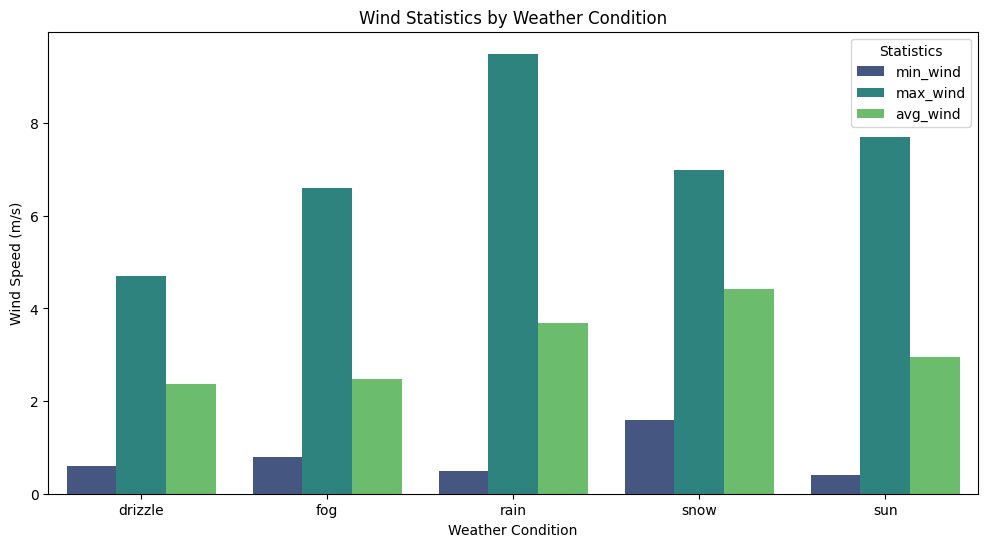

In [25]:
wind_table.columns = ['weather', 'min_wind', 'max_wind', 'avg_wind']

# Plotting
plt.figure(figsize=(12, 6))

# Melt the DataFrame for seaborn
#"melelehkan" (melt) atau merapihkan DataFrame dari bentuk lebar (wide format), menjadi bentuk panjang (long format)
wind_melted = pd.melt(wind_table, id_vars='weather', var_name='stat', value_name='value')

# Plot pake seaborn
sns.barplot(x='weather', y='value', hue='stat', data=wind_melted, palette='viridis')

plt.title('Wind Statistics by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Wind Speed (m/s)')
plt.legend(title='Statistics')
plt.show()

**Wind Level untuk semua Weathers dalam tahun berbeda**

In [26]:
wind_table_time_wise = df.groupby(['weather','year'])['wind'].agg(['min', 'max', 'mean']).reset_index()

In [27]:
wind_table_time_wise.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
weather,drizzle,drizzle,drizzle,fog,fog,fog,fog,rain,rain,rain,rain,snow,snow,snow,sun,sun,sun,sun
year,2012,2013,2015,2012,2013,2014,2015,2012,2013,2014,2015,2012,2013,2014,2012,2013,2014,2015
min,1.3,0.6,1.8,1.4,0.9,0.8,0.8,1.0,0.9,0.8,0.5,1.6,2.1,4.6,1.3,0.4,0.6,1.0
max,4.7,4.4,3.5,3.8,3.4,6.5,6.6,9.5,8.8,8.8,8.0,7.0,4.9,5.3,7.3,6.5,7.7,6.5
mean,2.536667,2.0,2.514286,2.42,2.1125,2.767857,2.446154,3.649721,3.573418,3.883784,3.615278,4.480952,3.566667,4.95,3.066071,2.668786,3.071123,3.011728


<Figure size 1400x1000 with 0 Axes>

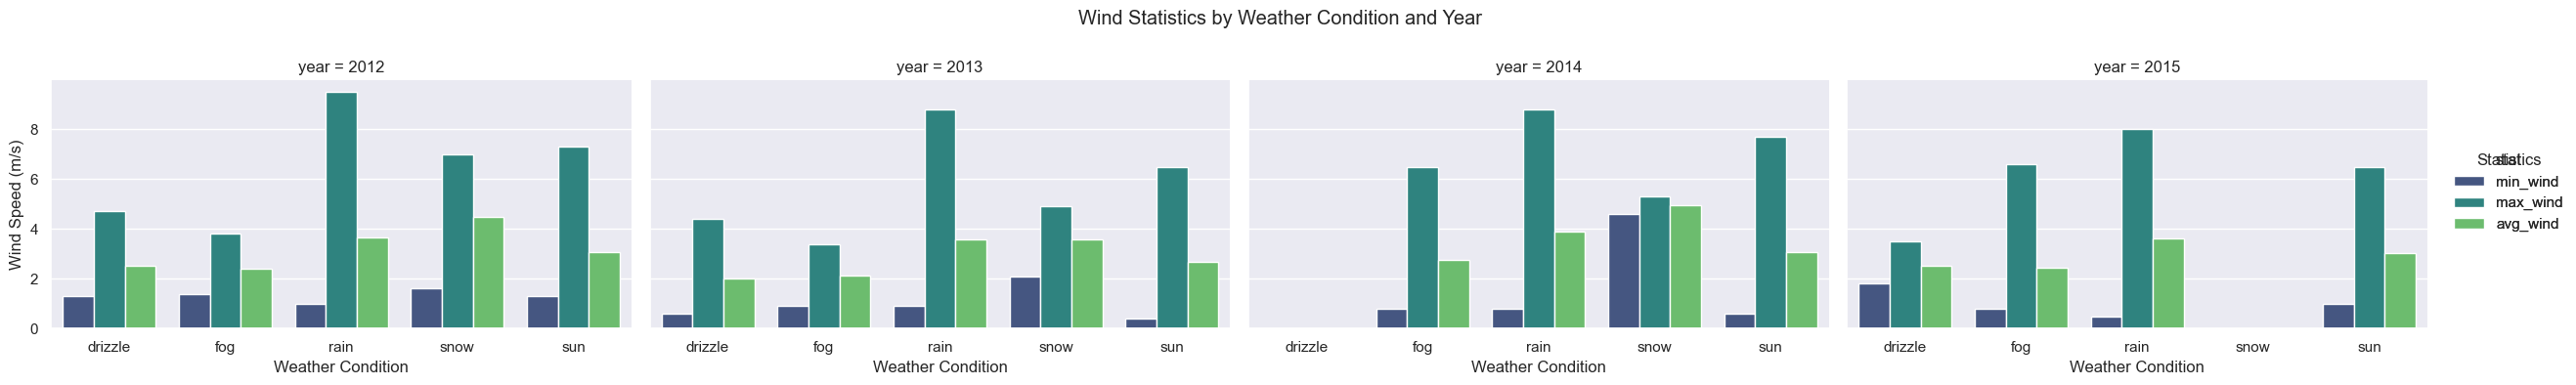

In [28]:
wind_table_time_wise.columns = ['weather', 'year', 'min_wind', 'max_wind', 'avg_wind']

# Set the style for the plot
sns.set(style="darkgrid")

# Plotting
plt.figure(figsize=(14, 10))

# Melt the DataFrame for seaborn
wind_melted = pd.melt(wind_table_time_wise, id_vars=['weather', 'year'], var_name='stat', value_name='value')

# Plot using seaborn with a palette suitable for dark themes
g = sns.catplot(x='weather', y='value', hue='stat', col='year', data=wind_melted, kind='bar', palette='viridis', height=4, aspect=1.5)

g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Wind Statistics by Weather Condition and Year')
g.set_axis_labels('Weather Condition', 'Wind Speed (m/s)')
g.add_legend(title='Statistics')

plt.show()

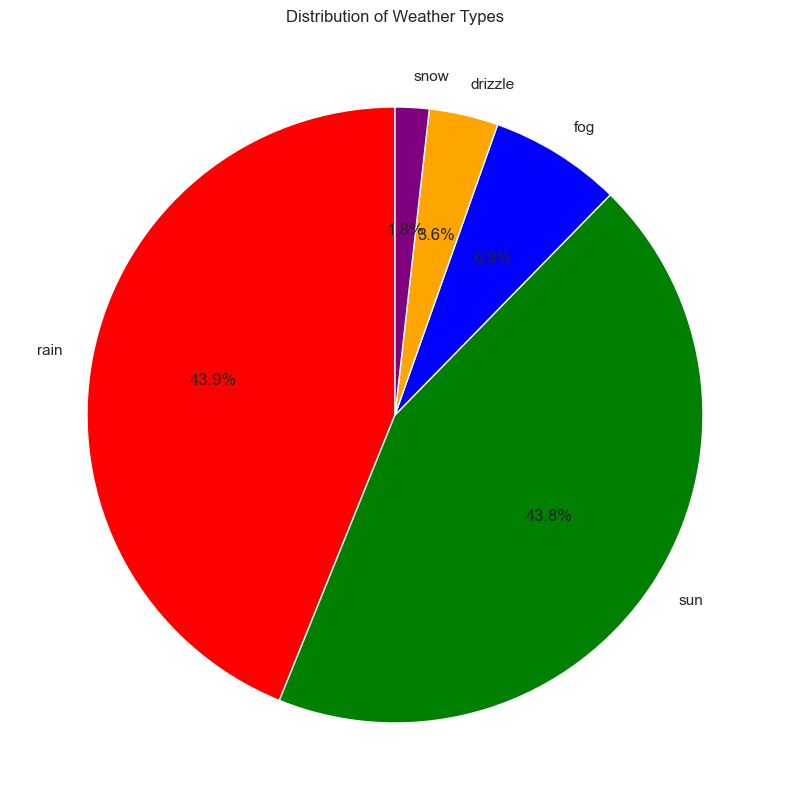

In [29]:
#Baris-baris kode ini untuk membuat diagram pie (pie chart) untuk memvisualisasikan distribusi berbagai jenis cuaca dalam dataset
x=df.weather.value_counts()
plt.figure(figsize=(12, 10))
plt.pie(x, labels=x.index, autopct='%1.1f%%', startangle=90, colors=['red', 'green', 'blue', 'orange', 'purple'])
plt.title('Distribution of Weather Types')
plt.show()

ML START

In [30]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.calibration import LabelEncoder
import seaborn as sns
from sklearn.discriminant_analysis import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb

In [31]:
print(df.head())

        date  precipitation  temp_max  temp_min  wind  weather  day  month  \
0 2012-01-01            0.0      12.8       5.0   4.7  drizzle    1      1   
1 2012-01-02           10.9      10.6       2.8   4.5     rain    2      1   
2 2012-01-03            0.8      11.7       7.2   2.3     rain    3      1   
3 2012-01-04           20.3      12.2       5.6   4.7     rain    4      1   
4 2012-01-05            1.3       8.9       2.8   6.1     rain    5      1   

   year  is_sunny  
0  2012         0  
1  2012         0  
2  2012         0  
3  2012         0  
4  2012         0  


In [32]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1435 non-null   float64       
 2   temp_max       1433 non-null   float64       
 3   temp_min       1440 non-null   float64       
 4   wind           1442 non-null   float64       
 5   weather        1461 non-null   object        
 6   day            1461 non-null   int32         
 7   month          1461 non-null   int32         
 8   year           1461 non-null   int32         
 9   is_sunny       1461 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int32(3), int64(1), object(1)
memory usage: 97.1+ KB
None


In [33]:
df['day_of_week'] = df['date'].dt.dayofweek

In [34]:
unique_classes = df['weather'].unique()
print("Data Target:", unique_classes)

Data Target: ['drizzle' 'rain' 'sun' 'snow' 'fog']


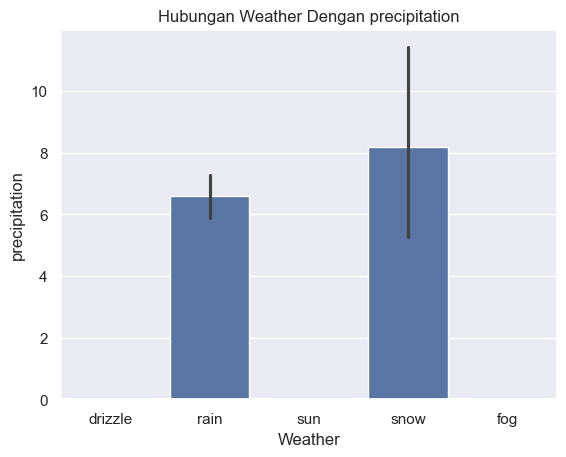

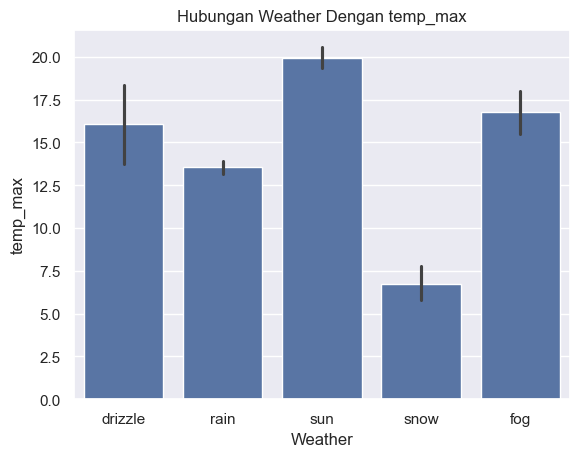

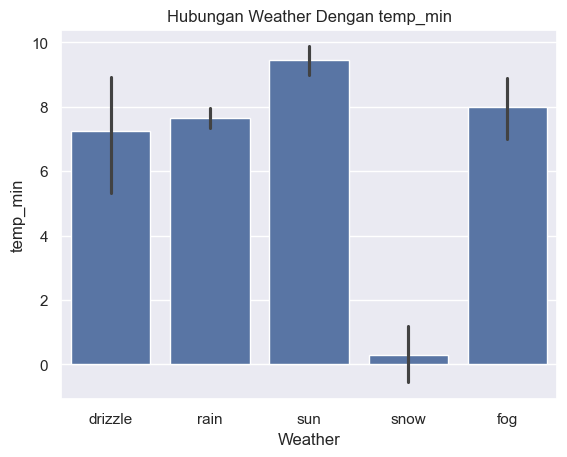

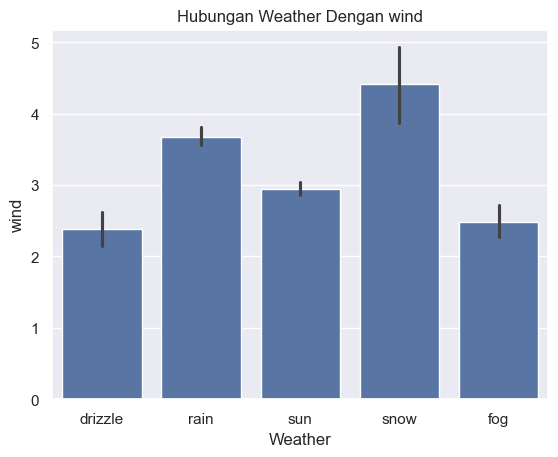

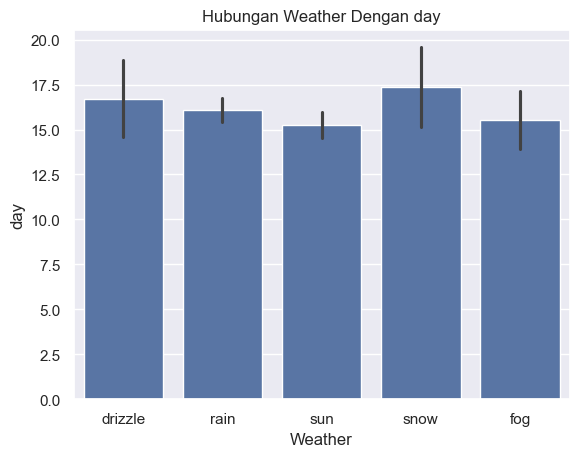

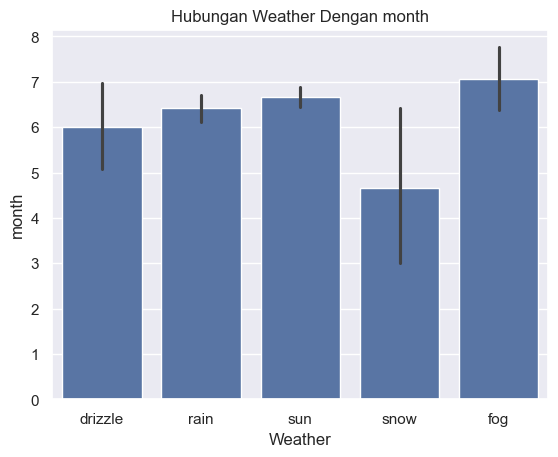

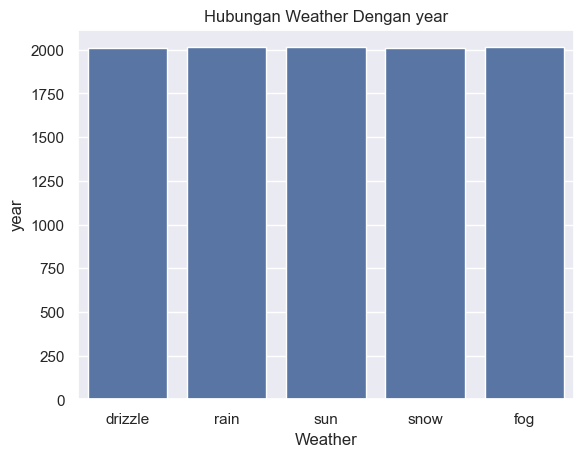

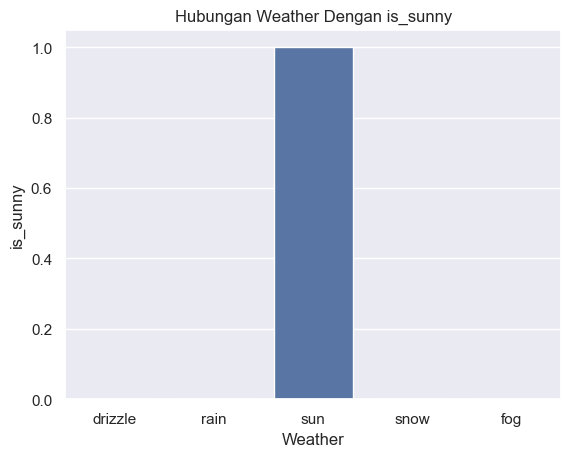

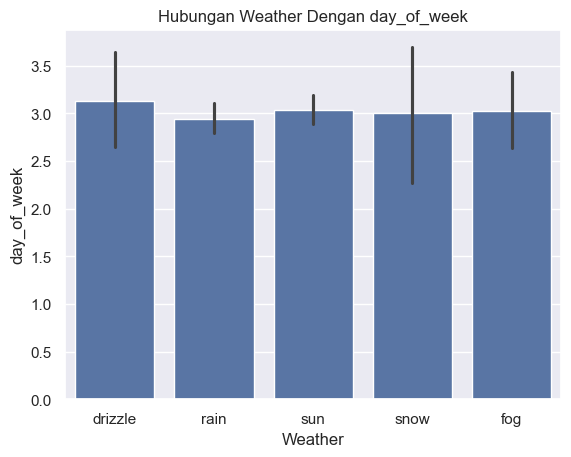

In [35]:
columns_no_weather = df.drop(columns=['date', 'weather']).columns
for col in columns_no_weather:
    sns.barplot(x= df['weather'], y = df[col])
    plt.title(f'Hubungan Weather Dengan {col}')
    plt.xlabel('Weather')
    plt.ylabel(col)
    plt.show()


Distribution of numerical features:


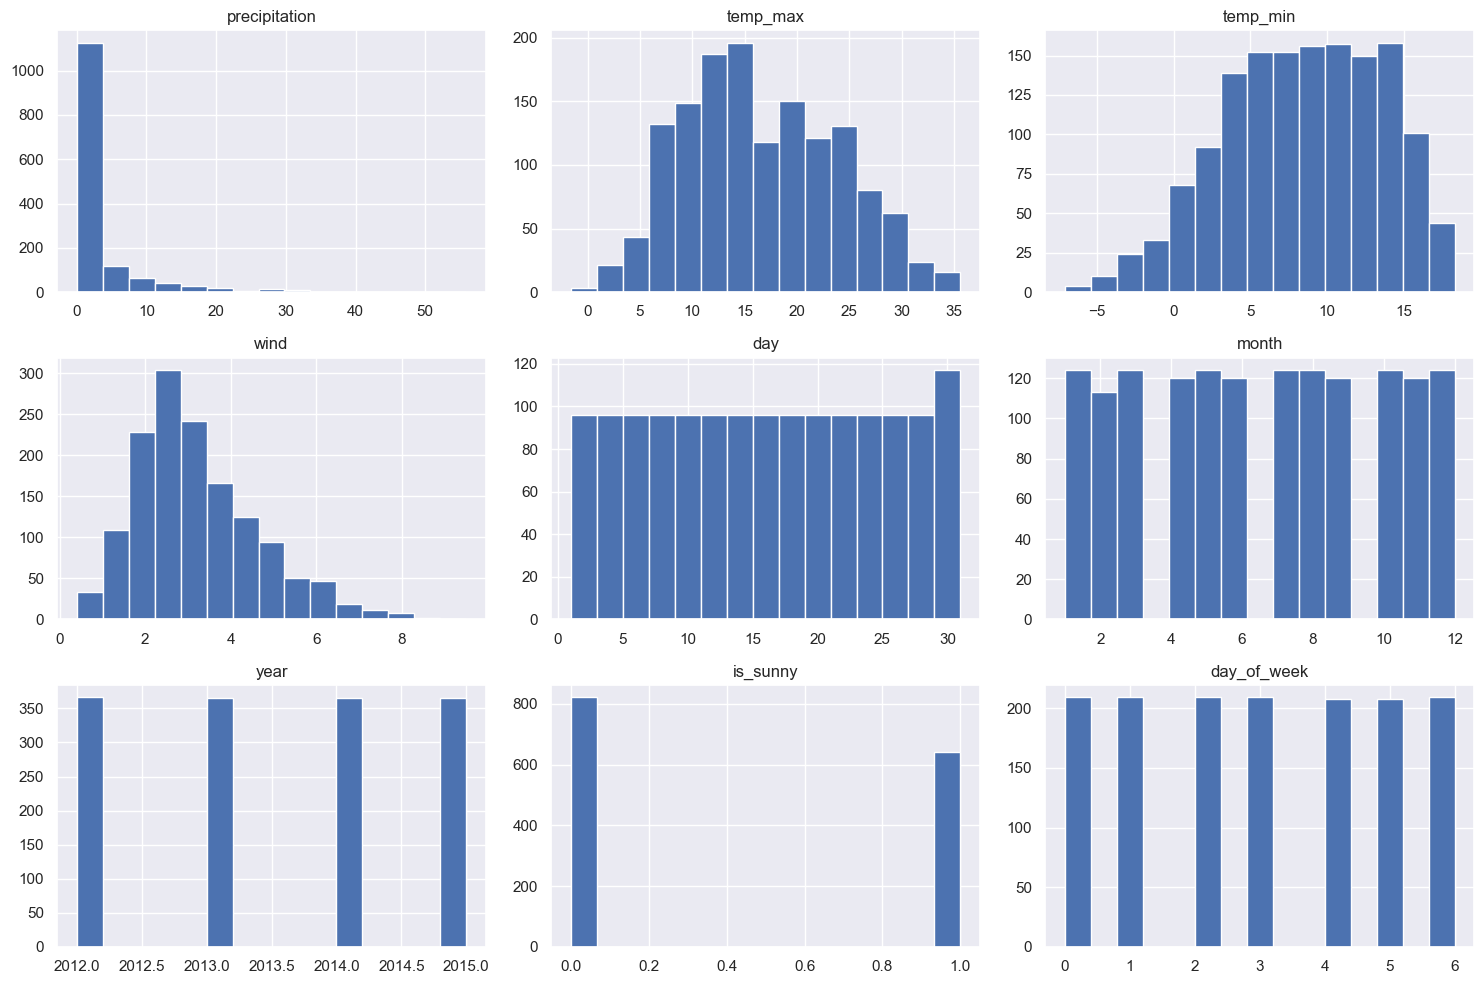

In [36]:
# Distribution of numerical features
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
print("\nDistribution of numerical features:")
df[numerical_features].hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()

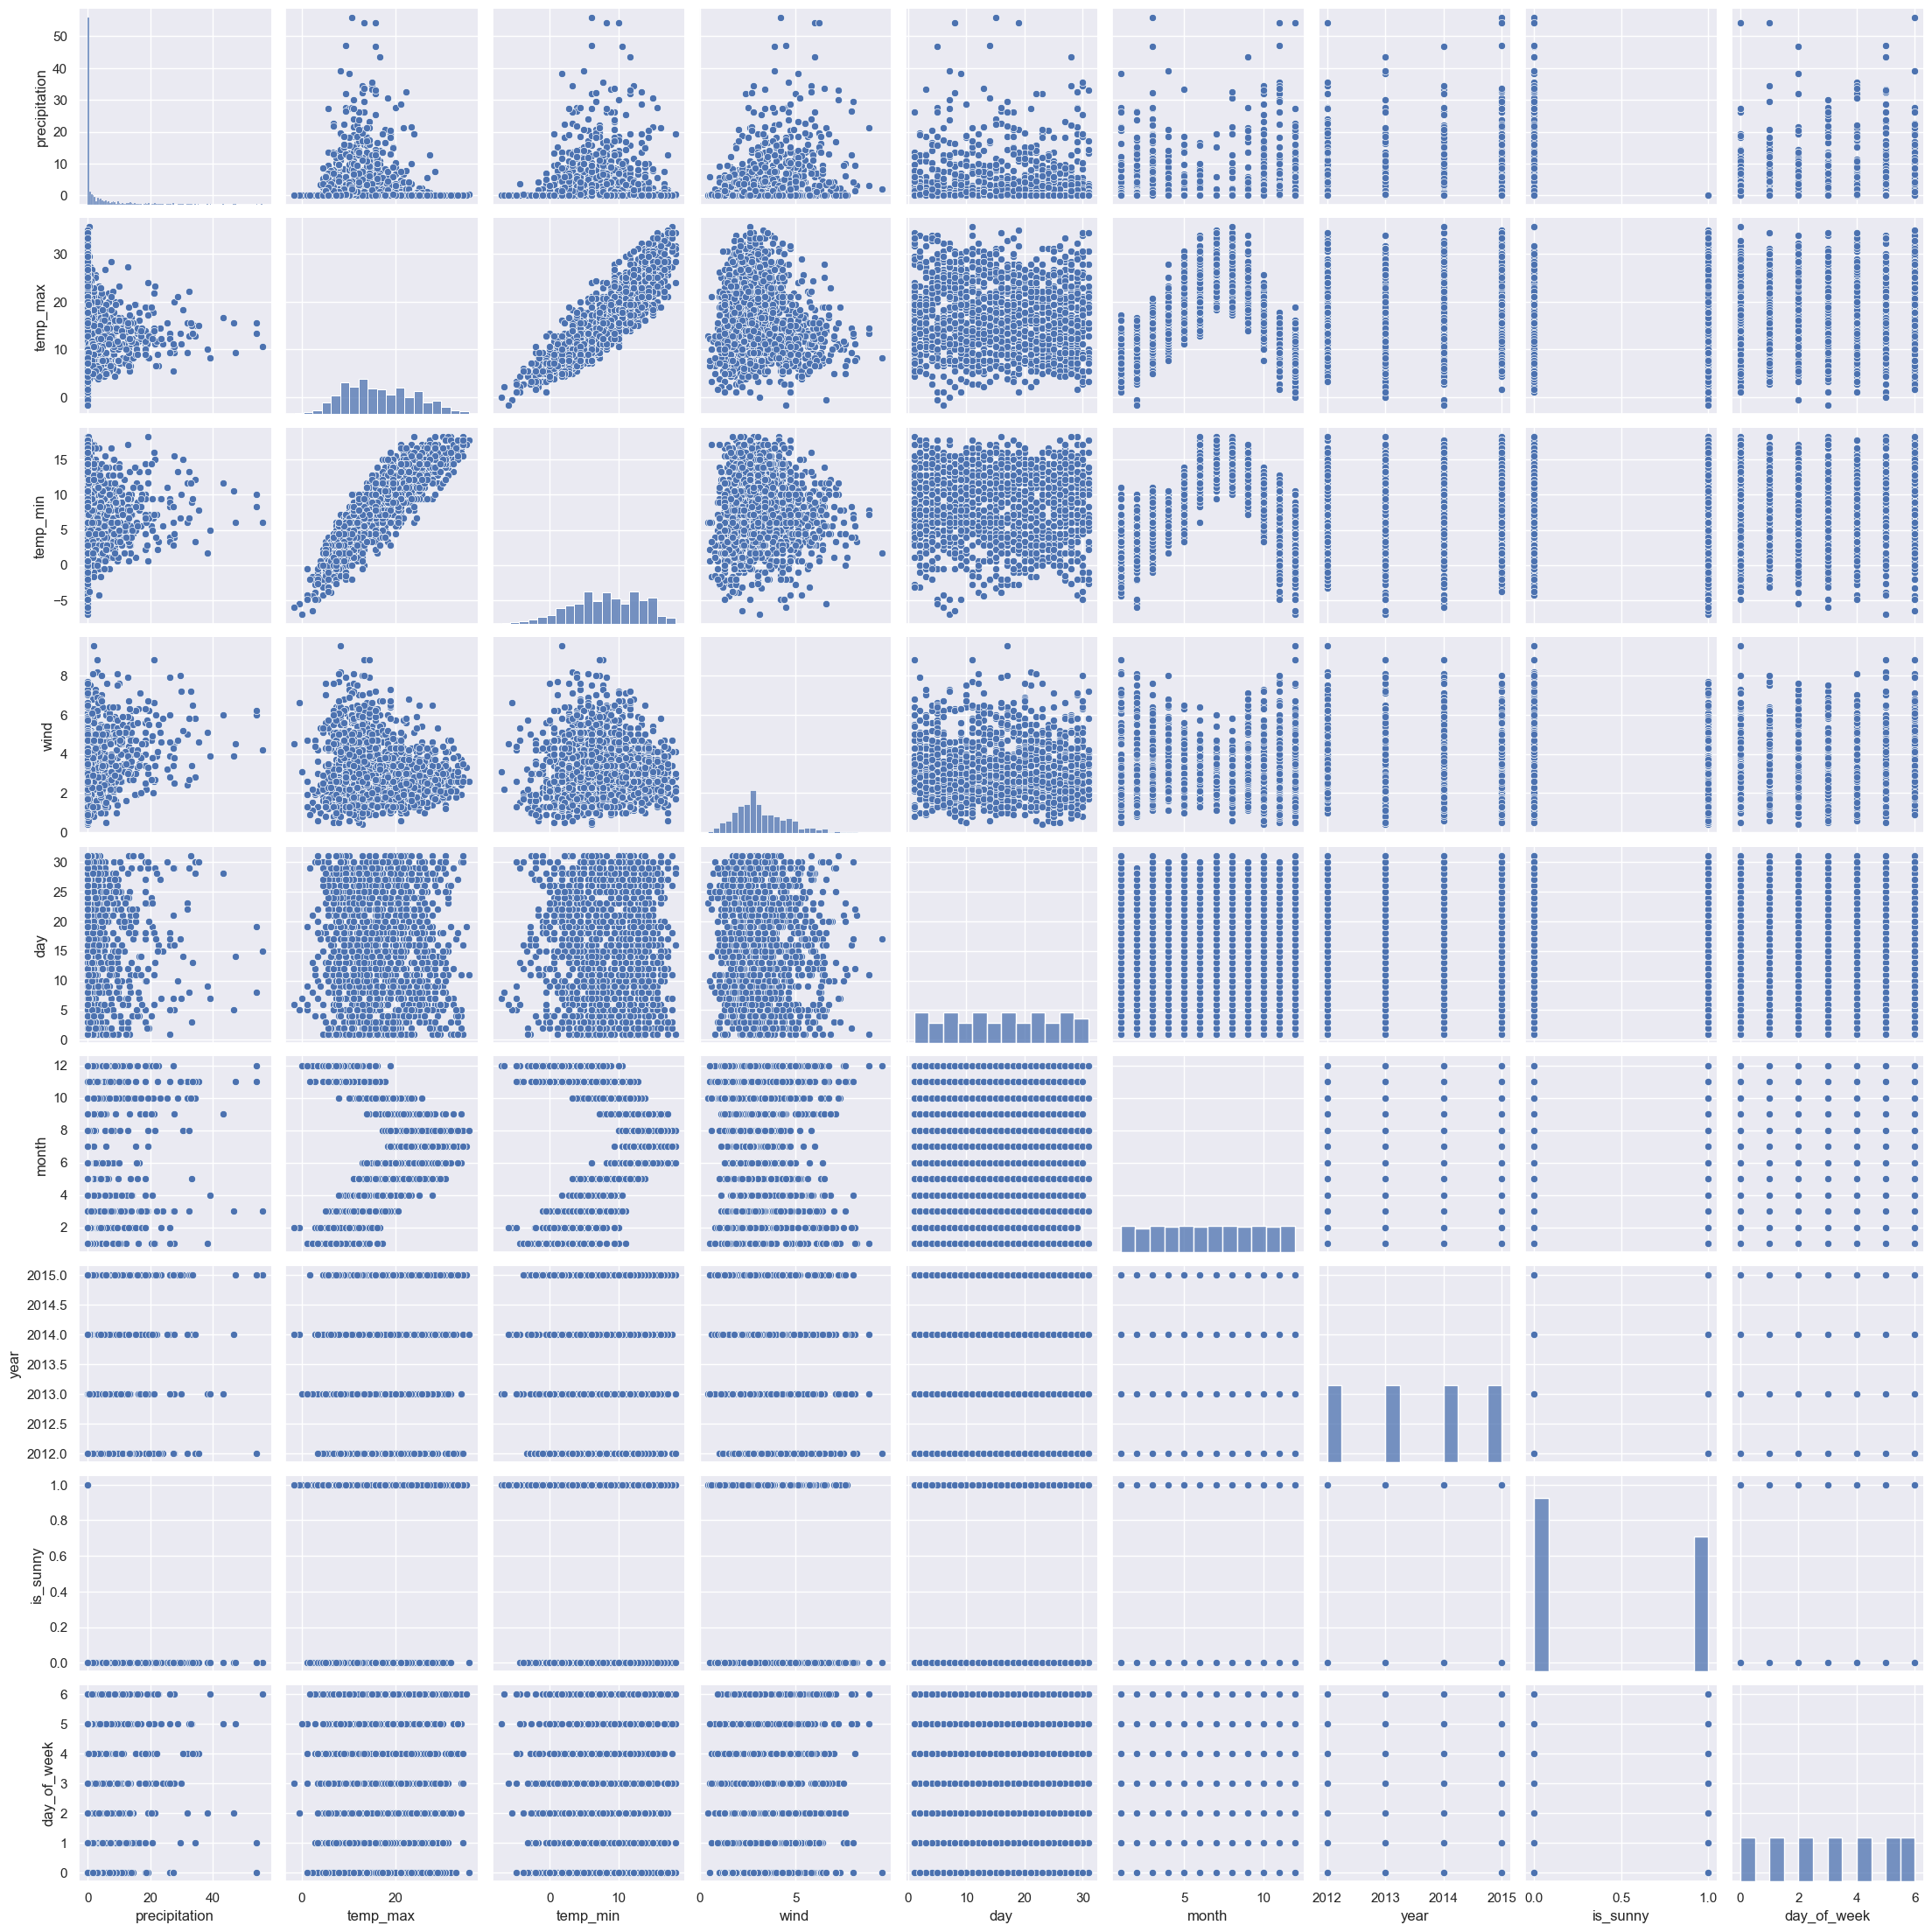

In [37]:
sns.pairplot(df)
plt.show()

Change Target From **Categorical** to **Numeric**

In [38]:
### CARA1
# df['weather'] = pd.Categorical(df['weather'])
# df['weather'] = df['weather'].cat.codes

### CARA2
df['weather'] = df['weather'].map({'drizzle':0, 'fog':1, 'rain':2, 'snow':3, 'sun':4})

### CARA3
# label_encoder = LabelEncoder()
# df['weather'] = label_encoder.fit_transform(df['weather'])

In [39]:
print(df.head())

        date  precipitation  temp_max  temp_min  wind  weather  day  month  \
0 2012-01-01            0.0      12.8       5.0   4.7        0    1      1   
1 2012-01-02           10.9      10.6       2.8   4.5        2    2      1   
2 2012-01-03            0.8      11.7       7.2   2.3        2    3      1   
3 2012-01-04           20.3      12.2       5.6   4.7        2    4      1   
4 2012-01-05            1.3       8.9       2.8   6.1        2    5      1   

   year  is_sunny  day_of_week  
0  2012         0            6  
1  2012         0            0  
2  2012         0            1  
3  2012         0            2  
4  2012         0            3  


Make scatterplot to see every columns pattern

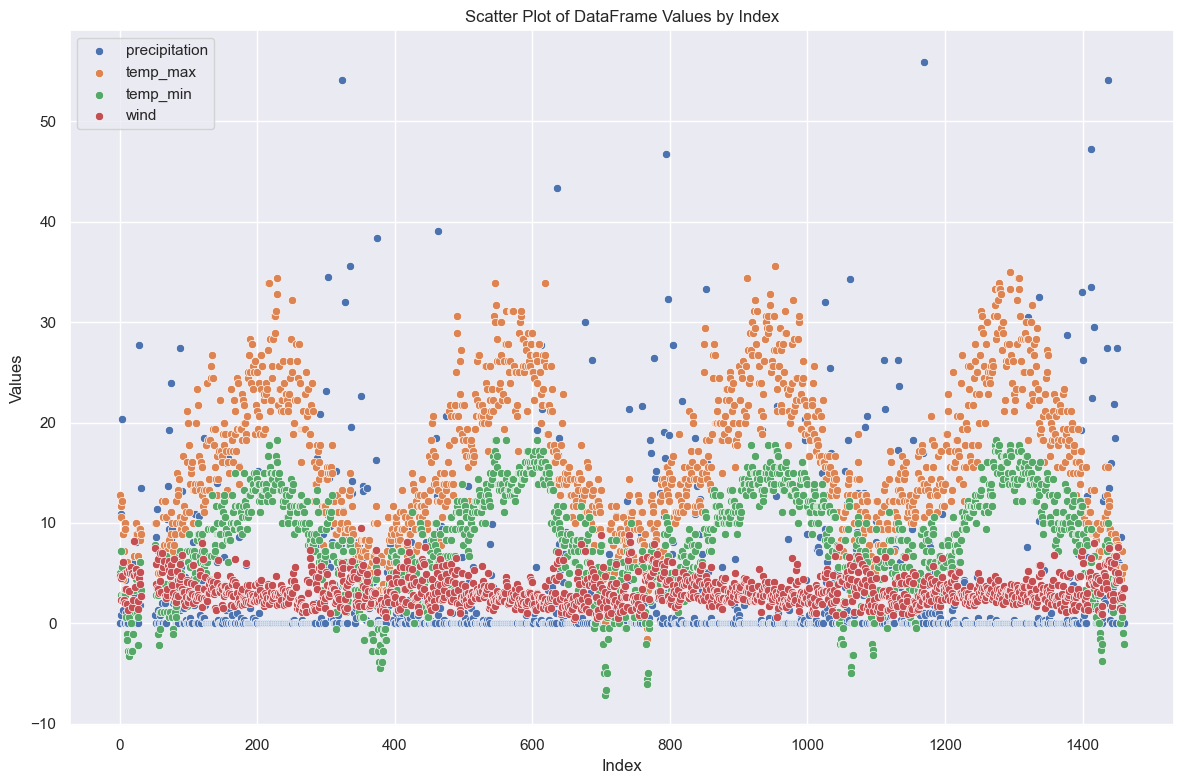

In [40]:
scatter_df = df.select_dtypes(include=[np.float64])

# Create a scatter plot
plt.figure(figsize=(12, 8))
for col in scatter_df.columns:
    sns.scatterplot(x=scatter_df.index, y=scatter_df[col], label=col)
plt.title("Scatter Plot of DataFrame Values by Index")
plt.xlabel("Index")
plt.ylabel("Values")
plt.tight_layout()
plt.show()

Correlation

                   date  precipitation  temp_max  temp_min      wind  \
date           1.000000       0.021584  0.114426  0.144045 -0.036873   
precipitation  0.021584       1.000000 -0.223292 -0.066945  0.333837   
temp_max       0.114426      -0.223292  1.000000  0.874206 -0.164267   
temp_min       0.144045      -0.066945  0.874206  1.000000 -0.074315   
wind          -0.036873       0.333837 -0.164267 -0.074315  1.000000   
weather        0.067043      -0.269805  0.327071  0.159330 -0.071052   
day            0.022101       0.017383 -0.041611 -0.015025 -0.032864   
month          0.250292       0.035316  0.127113  0.201993 -0.046436   
year           0.968246       0.012536  0.086007  0.096714 -0.025266   
is_sunny       0.095876      -0.399430  0.407978  0.200180 -0.180928   
day_of_week   -0.000594       0.031861 -0.002671  0.001674  0.023912   

                weather       day     month      year  is_sunny  day_of_week  
date           0.067043  0.022101  0.250292  0.968246  0

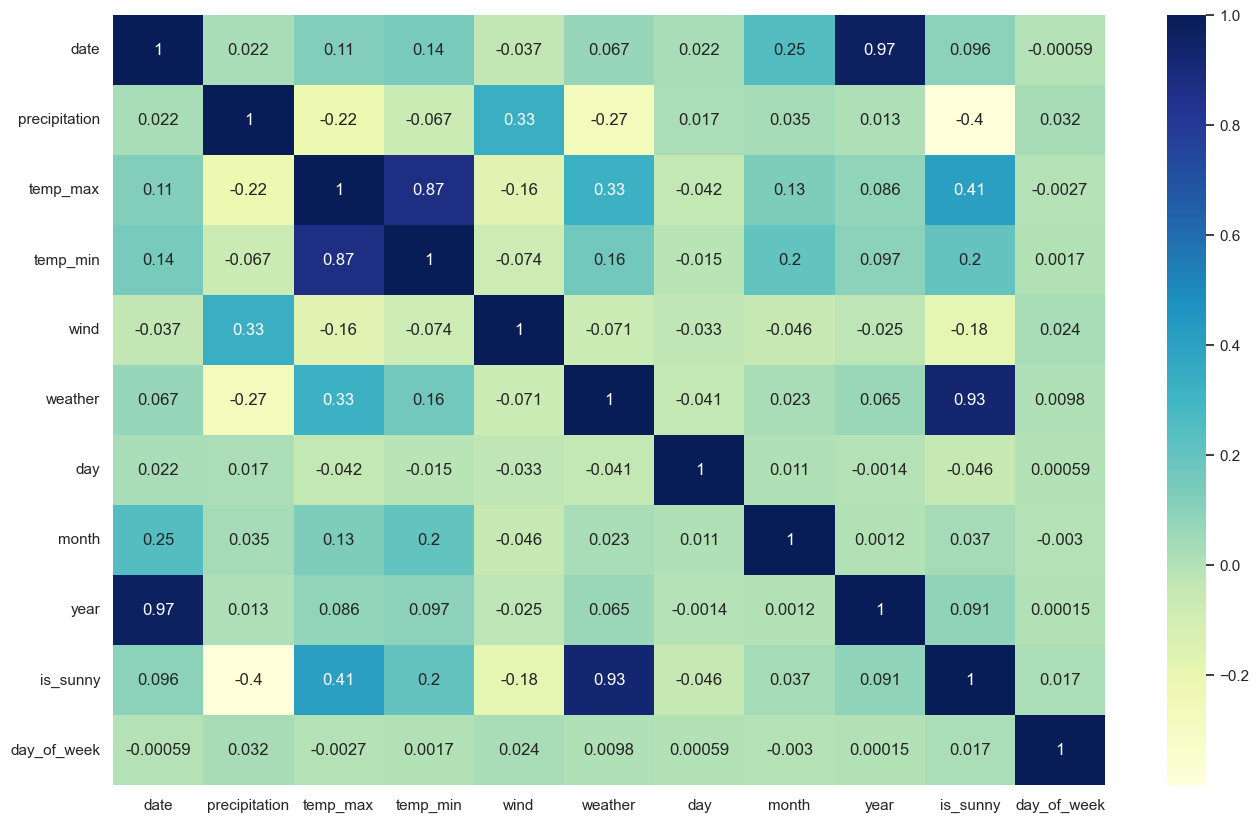

In [41]:
corr = df.corr()
print(corr)
plt.figure(figsize=(16, 10))
sns.heatmap(corr, annot = True, cmap="YlGnBu")
plt.show()

In [42]:
# Melihat Data yang kosong
missing_values = df.isnull().sum()
print(missing_values)

date              0
precipitation    26
temp_max         28
temp_min         21
wind             19
weather           0
day               0
month             0
year              0
is_sunny          0
day_of_week       0
dtype: int64


In [43]:
# Menghapus Data yang Kosong
df = df.dropna()

missing_values = df.isnull().sum()
print(missing_values)

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
day              0
month            0
year             0
is_sunny         0
day_of_week      0
dtype: int64


WEATHER DENGAN WIND DAN PRECIPITATION NEGATIF

In [44]:
# Pisahkan antara target dengan features. Target disini adalah Weather
x = df.drop(columns=['date', 'weather']) #buang date. karena data date sudah disederhanakan
y = df['weather']

In [45]:
unique_classes = df['weather'].unique()
print("Data Target:", unique_classes)

Data Target: [0 2 4 3 1]


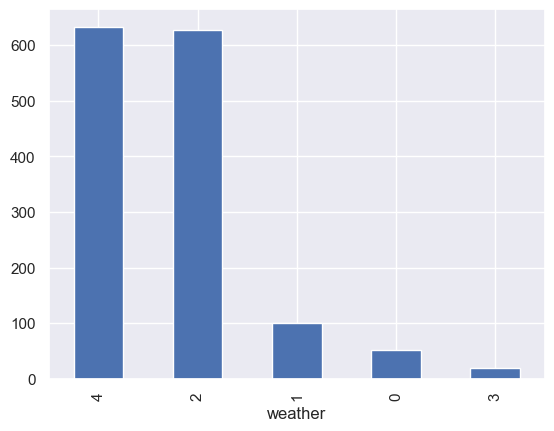

weather
4    633
2    628
1    101
0     52
3     19
Name: count, dtype: int64
(1433,)


In [46]:
y.value_counts().plot(kind='bar')
plt.show()

print(y.value_counts())
print(y.shape)

In [47]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state= 42)
x_final,y = smote.fit_resample(x,y)

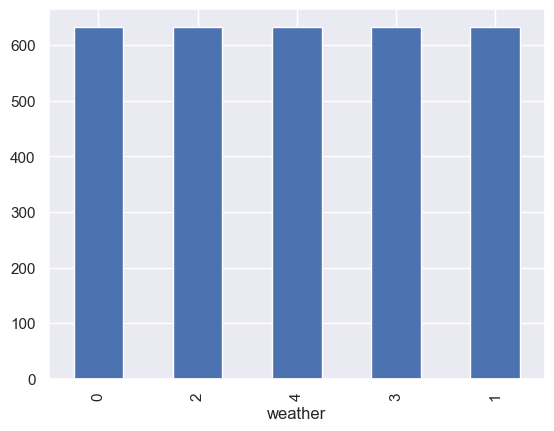

weather
0    633
2    633
4    633
3    633
1    633
Name: count, dtype: int64
(3165,)


In [48]:
y.value_counts().plot(kind='bar')
plt.show()

print(y.value_counts())
print(y.shape)

In [49]:
# Buat train dan test
X_train, X_test, y_train, y_test = train_test_split(x_final,y, test_size=0.3, random_state=42, stratify=y)
print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)
print()
print("Y_train shape: ",y_train.shape)
print("Y_test shape: ",y_test.shape)

X_train shape:  (2215, 9)
X_test shape:  (950, 9)

Y_train shape:  (2215,)
Y_test shape:  (950,)


## Scaler

In [50]:
numvars = X_train.columns
scaler = MinMaxScaler()
X_train[numvars] = scaler.fit_transform(X_train[numvars])
X_test[numvars] = scaler.transform(X_test[numvars])

In [51]:
print(X_train.head())
print(X_test.head())

      precipitation  temp_max  temp_min      wind       day     month  \
2929       0.161287  0.279973  0.299282  0.381478  0.500000  0.090909   
2292       0.000000  0.299505  0.338505  0.252313  0.700000  0.909091   
1915       0.000000  0.727100  0.786384  0.194839  0.800000  0.545455   
2781       0.027223  0.112709  0.267450  0.267369  0.333333  0.181818   
1807       0.000000  0.647766  0.849099  0.250405  0.600000  0.636364   

          year  is_sunny  day_of_week  
2929  0.000000       0.0     0.833333  
2292  0.666667       0.0     1.000000  
1915  0.000000       0.0     0.500000  
2781  0.000000       0.0     0.500000  
1807  0.000000       0.0     0.833333  
      precipitation  temp_max  temp_min      wind       day     month  year  \
305        0.026834  0.368421  0.586614  0.417582  0.933333  0.909091   0.0   
2503       0.000000  0.507281  0.654050  0.108634  0.933333  0.727273   1.0   
1621       0.000000  0.350957  0.413196  0.340262  0.133333  0.090909   0.0   
2773 

In [52]:
print(X_train.describe())
print(X_test.describe())

       precipitation     temp_max     temp_min         wind          day  \
count    2215.000000  2215.000000  2215.000000  2215.000000  2215.000000   
mean        0.054152     0.418145     0.539053     0.308162     0.505523   
std         0.108981     0.214800     0.214668     0.158162     0.269801   
min         0.000000     0.000000     0.000000     0.000000     0.000000   
25%         0.000000     0.235967     0.346457     0.186813     0.266667   
50%         0.000000     0.388353     0.519685     0.267369     0.533333   
75%         0.064401     0.593592     0.737627     0.417582     0.733333   
max         1.000000     1.000000     1.000000     1.000000     1.000000   

             month         year    is_sunny  day_of_week  
count  2215.000000  2215.000000  2215.00000  2215.000000  
mean      0.479704     0.388563     0.20000     0.469526  
std       0.324673     0.376609     0.40009     0.299866  
min       0.000000     0.000000     0.00000     0.000000  
25%       0.181818  

# XGBOOST MODEL

In [53]:
# Define the parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Set up the grid search
xgb_model = xgb.XGBClassifier(random_state=42)
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=3, n_jobs=-1, verbose=0, scoring='accuracy')

# Perform grid search
grid_search_xgb.fit(X_train, y_train)

# Get the best model
best_model_xgb = grid_search_xgb.best_estimator_

# Evaluate the best model
y_pred_xgb = best_model_xgb.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_xgb)
print(f'Best Model Validation Accuracy (xgboost): {accuracy_rf:.2f}')
print(f'Best Parameters (xgboost): {grid_search_xgb.best_params_}')
print('Classification Report (random forest)\n', classification_report(y_test, y_pred_xgb))


Best Model Validation Accuracy (xgboost): 0.97
Best Parameters (xgboost): {'colsample_bytree': 0.6, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Classification Report (random forest)
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       190
           1       0.94      0.98      0.96       190
           2       0.98      0.91      0.95       190
           3       0.97      0.99      0.98       190
           4       1.00      1.00      1.00       190

    accuracy                           0.97       950
   macro avg       0.97      0.97      0.97       950
weighted avg       0.97      0.97      0.97       950



[[179   9   2   0   0]
 [  3 187   0   0   0]
 [  8   3 173   6   0]
 [  0   0   1 189   0]
 [  0   0   0   0 190]]


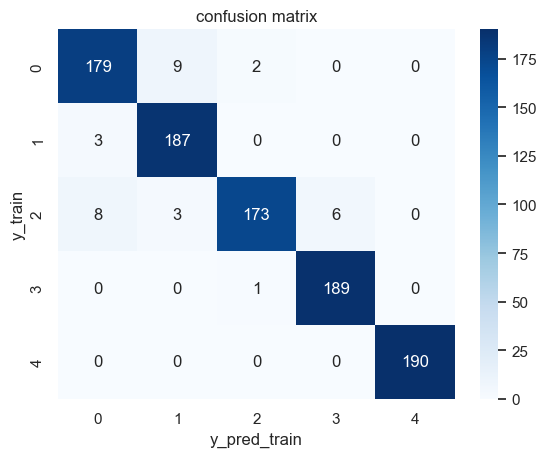

In [54]:
cm = confusion_matrix(y_test, y_pred_xgb)
print(cm)
sns.heatmap(cm, annot=True,  fmt='.0f', cmap=plt.cm.Blues)
plt.xlabel('y_pred_train')
plt.ylabel('y_train')
plt.title('confusion matrix')
plt.show()

# RANDOM FOREST MODEL

In [55]:
# Define the parameter grid for random forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Set up the grid search
rf_model = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=0, scoring='accuracy')

# Perform grid search
grid_search_rf.fit(X_train, y_train)

# Get the best model
best_model_rf = grid_search_rf.best_estimator_

# Evaluate the best model
y_pred_rf = best_model_rf.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_rf)
print(f'Best Model Validation Accuracy (random forest): {accuracy_xgb:.2f}')
print(f'Best Parameters (random forest): {grid_search_rf.best_params_}')
print('Classification Report (random forest)\n', classification_report(y_test, y_pred_rf))


Best Model Validation Accuracy (random forest): 0.97
Best Parameters (random forest): {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Classification Report (random forest)
               precision    recall  f1-score   support

           0       0.94      0.95      0.94       190
           1       0.94      0.99      0.96       190
           2       0.99      0.91      0.95       190
           3       0.97      0.99      0.98       190
           4       1.00      1.00      1.00       190

    accuracy                           0.97       950
   macro avg       0.97      0.97      0.97       950
weighted avg       0.97      0.97      0.97       950



[[180  10   0   0   0]
 [  2 188   0   0   0]
 [ 10   2 173   5   0]
 [  0   0   2 188   0]
 [  0   0   0   0 190]]


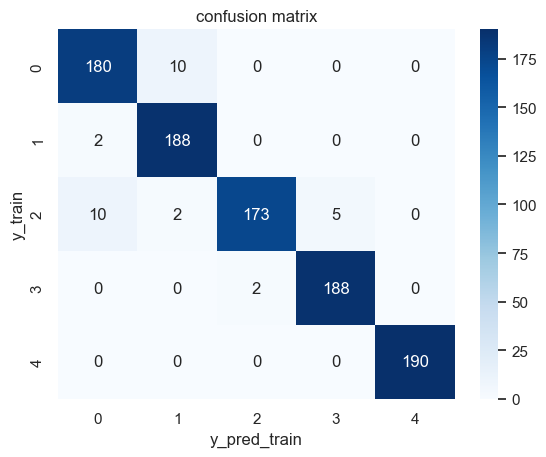

In [56]:
cm = confusion_matrix(y_test, y_pred_rf)
print(cm)
sns.heatmap(cm, annot=True,  fmt='.0f', cmap=plt.cm.Blues)
plt.xlabel('y_pred_train')
plt.ylabel('y_train')
plt.title('confusion matrix')
plt.show()

# EVALUATE

# Testing

## XGBoost

In [57]:
# input 9 fitur untuk prediksi
# precipitation, temp_max, temp_min, wind, day, month,  year, is_sunny, day_of_week
new_data = [[1.4, 5.373, 0.1, 5.3, 0.2, 0.07, 3.666667, 0.0, 1.0]]  # Example feature set for prediction

# model terbaik
prediction = best_model_xgb.predict(new_data)

# kategori cuaca
label_mapping = {
    0: 'drizzle',
    1: 'fog',
    2: 'rain',
    3: 'snow',
    4: 'sun'
}

# Convert prediction to weather category
predicted_category = label_mapping[prediction[0]]

print(f'Prediksi cuaca: {predicted_category}')


Prediksi cuaca: rain


## Random Forest

In [58]:
# input 9 fitur untuk prediksi
# precipitation, temp_max, temp_min, wind, day, month,  year, is_sunny, day_of_week
new_data = [[1.4, 5.373, 0.1, 5.3, 0.2, 0.07, 3.666667, 0.0, 1.0]]  # Example feature set for prediction

# model terbaik
prediction = best_model_rf.predict(new_data)
# kategori cuaca
label_mapping = {
    0: 'drizzle',
    1: 'fog',
    2: 'rain',
    3: 'snow',
    4: 'sun'
}

# Convert prediction to weather category
predicted_category = label_mapping[prediction[0]]

print(f'Prediksi cuaca: {predicted_category}')


Prediksi cuaca: rain


# DEEP LEARNING MODEL

# ARIMA

In [59]:
from statsmodels.tsa.arima.model import ARIMA

train_size = int(len(y) * 0.8)
train, test = y[:train_size], y[train_size:]

arima_model = ARIMA(train, order=(5, 1, 1))
arima_model_fit = arima_model.fit()

forecast = arima_model_fit.forecast(steps=len(test))
forecast_rounded = np.round(forecast)

arima_accuracy = accuracy_score(test, forecast_rounded)
print('ARIMA Model Accuracy:', arima_accuracy)
print(classification_report(test, forecast_rounded))

ARIMA Model Accuracy: 0.022116903633491312
              precision    recall  f1-score   support

           1       0.02      1.00      0.04        14
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00       614

    accuracy                           0.02       633
   macro avg       0.01      0.33      0.01       633
weighted avg       0.00      0.02      0.00       633



## Evaluate

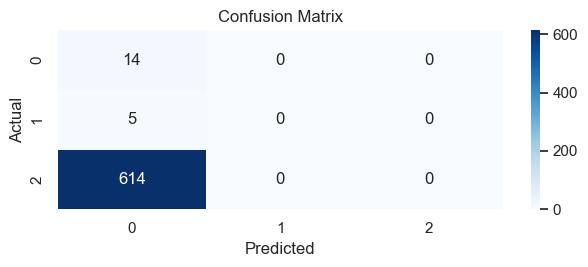

In [60]:
plt.subplot(2, 1, 2)
cm = confusion_matrix(test, forecast_rounded)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

# SINGLE LAYER

In [61]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam


single_layer_model = Sequential()
single_layer_model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
single_layer_model.add(Dense(5, activation='softmax'))

# optimizer = Adam(learning_rate=0.0001)

single_layer_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

single_layer_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         2,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,845 (15.02 KB)

 Trainable params: 3,845 (15.02 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
history_singlelayer=single_layer_model.fit(X_train, y_train, epochs=100, batch_size=8,verbose=1, validation_data=(X_test, y_test))

Epoch 1/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5534 - loss: 1.2808 - val_accuracy: 0.7568 - val_loss: 0.6974
Epoch 2/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7734 - loss: 0.6394 - val_accuracy: 0.8053 - val_loss: 0.5794
Epoch 3/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8113 - loss: 0.5266 - val_accuracy: 0.8084 - val_loss: 0.5173
Epoch 4/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8335 - loss: 0.4764 - val_accuracy: 0.8189 - val_loss: 0.4730
Epoch 5/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8532 - loss: 0.4159 - val_accuracy: 0.8400 - val_loss: 0.4478
Epoch 6/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8692 - loss: 0.3979 - val_accuracy: 0.8537 - val_loss: 0.4193
Epoch 7/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8661 - loss: 0.3783 - val_accuracy: 0.8589 - val_loss: 0.3995
Epoch 8/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8671 - loss: 0.3539 - val_accu

## Evaluate

In [63]:
y_pred_single_layer = single_layer_model.predict(X_test)
y_pred_single_layer_classes = np.argmax(y_pred_single_layer, axis=1)
single_layer_accuracy = accuracy_score(y_test, y_pred_single_layer_classes)
print('Single-Layer Neural Network Accuracy:', single_layer_accuracy)
print(classification_report(y_test, y_pred_single_layer_classes))

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Single-Layer Neural Network Accuracy: 0.9589473684210527
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       190
           1       0.93      0.96      0.95       190
           2       1.00      0.89      0.94       190
           3       0.97      1.00      0.98       190
           4       1.00      1.00      1.00       190

    accuracy                           0.96       950
   macro avg       0.96      0.96      0.96       950
weighted avg       0.96      0.96      0.96       950



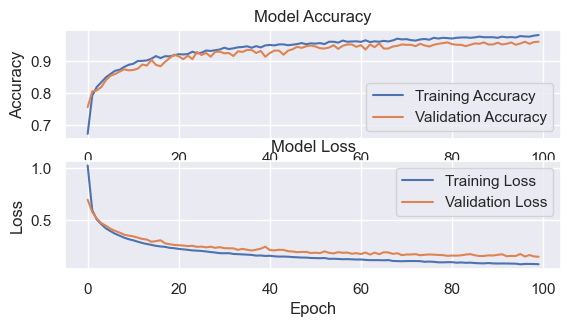

In [64]:
plt.subplot(3, 1, 1)
plt.plot(history_singlelayer.history['accuracy'], label='Training Accuracy')
plt.plot(history_singlelayer.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(history_singlelayer.history['loss'], label='Training Loss')
plt.plot(history_singlelayer.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

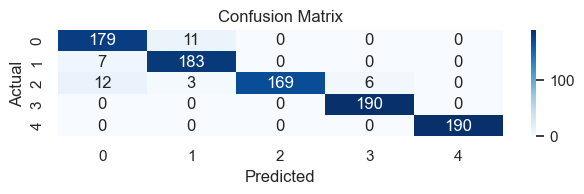

In [65]:
plt.subplot(3, 1, 3)
cm = confusion_matrix(y_test, y_pred_single_layer_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

# MULTI LAYER

In [66]:
multi_layer_model = Sequential()
multi_layer_model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
multi_layer_model.add(Dense(256, activation='relu'))
multi_layer_model.add(Dense(5, activation='softmax'))
multi_layer_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

multi_layer_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 512)            │         5,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 137,733 (538.02 KB)

 Trainable params: 137,733 (538.02 KB)

 Non-trainable params: 0 (0.00 B)

In [67]:
history_multilayer = multi_layer_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_data=(X_test, y_test))


## Evaluate

In [68]:
y_pred_multi_layer = multi_layer_model.predict(X_test)
y_pred_multi_layer_classes = np.argmax(y_pred_multi_layer, axis=1)
multi_layer_accuracy = accuracy_score(y_test, y_pred_multi_layer_classes)
print('Multi-Layer Neural Network Accuracy:', multi_layer_accuracy)
print(classification_report(y_test, y_pred_multi_layer_classes))

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Multi-Layer Neural Network Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       190
           1       0.91      0.96      0.93       190
           2       0.98      0.91      0.94       190
           3       0.98      1.00      0.99       190
           4       1.00      1.00      1.00       190

    accuracy                           0.96       950
   macro avg       0.96      0.96      0.96       950
weighted avg       0.96      0.96      0.96       950



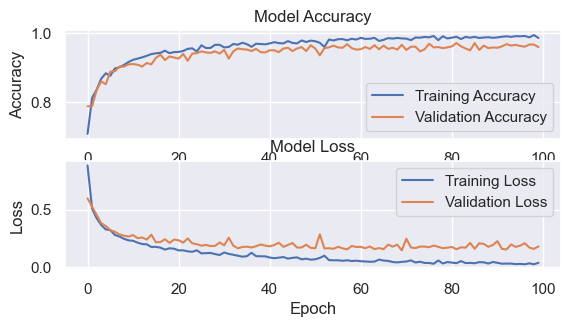

In [69]:
plt.subplot(3, 1, 1)
plt.plot(history_multilayer.history['accuracy'], label='Training Accuracy')
plt.plot(history_multilayer.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(history_multilayer.history['loss'], label='Training Loss')
plt.plot(history_multilayer.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

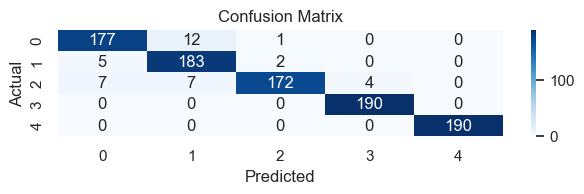

In [70]:
plt.subplot(3, 1, 3)
cm = confusion_matrix(y_test, y_pred_multi_layer_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

# LSTM

In [71]:
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.models import Sequential

X_train_lstm = X_train.to_numpy().reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.to_numpy().reshape((X_test.shape[0], 1, X_test.shape[1]))

lstm_model = Sequential()
lstm_model.add(LSTM(512, activation='tanh', input_shape=(1, X_train.shape[1]),return_sequences=True))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(256, activation='tanh'))
lstm_model.add(Dense(5, activation='softmax'))

lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'],)

print("LSTM Model Summary:")
lstm_model.summary()


LSTM Model Summary:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 512)         │     1,069,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 512)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 256)            │       787,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,857,797 (7.09 MB)

 Trainable params: 1,857,797 (7.09 MB)

 Non-trainable params: 0 (0.00 B)

In [72]:
from tensorflow.keras.callbacks import EarlyStopping
earlystop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history_lstm=lstm_model.fit(X_train_lstm, y_train, epochs=100, batch_size=8,verbose=0 ,validation_data=(X_test_lstm, y_test),callbacks=earlystop)


In [73]:
# Saving model

lstm_model.save('lstm_weather_model.keras')
print('Model save Succesfull')

Model save Succesfull


## Evaluate

In [74]:
y_pred_lstm = lstm_model.predict(X_test_lstm)
y_pred_lstm_classes = np.argmax(y_pred_lstm, axis=1)
lstm_accuracy = accuracy_score(y_test, y_pred_lstm_classes)
print('LSTM Accuracy:', lstm_accuracy)
print("LSTM Classification Report:")
print(classification_report(y_test, y_pred_lstm_classes))

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
LSTM Accuracy: 0.9357894736842105
LSTM Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       190
           1       0.88      0.93      0.91       190
           2       0.96      0.84      0.90       190
           3       0.95      1.00      0.98       190
           4       1.00      1.00      1.00       190

    accuracy                           0.94       950
   macro avg       0.94      0.94      0.94       950
weighted avg       0.94      0.94      0.94       950



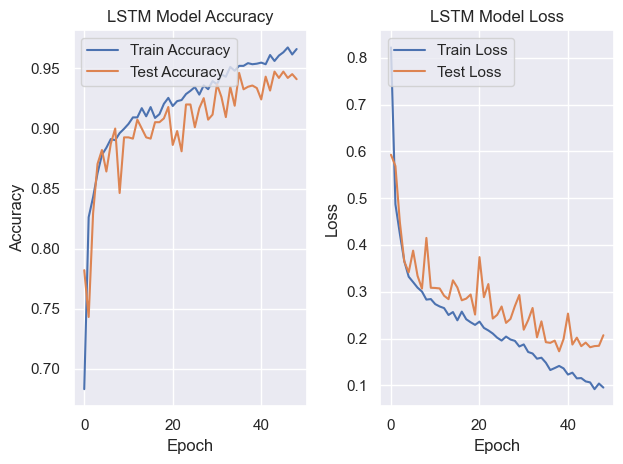

In [75]:
plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['accuracy'], label='Train Accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='Test Accuracy')
plt.title('LSTM Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['loss'], label='Train Loss')
plt.plot(history_lstm.history['val_loss'], label='Test Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

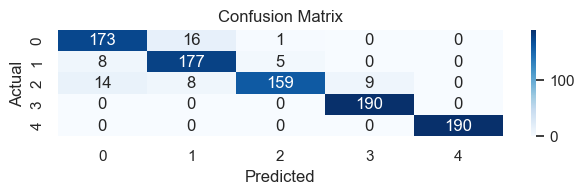

In [76]:
plt.subplot(3, 1, 3)
cm = confusion_matrix(y_test, y_pred_lstm_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

# RNN

In [77]:
from tensorflow.keras.layers import SimpleRNN
X_train_rnn = X_train.to_numpy().reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_rnn = X_test.to_numpy().reshape((X_test.shape[0], 1, X_test.shape[1]))

rnn_model = Sequential()
rnn_model.add(SimpleRNN(512, activation='tanh', input_shape=(1, X_train.shape[1]),return_sequences=True))
rnn_model.add(Dropout(0.2))
rnn_model.add(SimpleRNN(256, activation='tanh'))
rnn_model.add(Dense(5, activation='softmax'))
rnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print("SimpleRNN Model Summary:")
rnn_model.summary()

SimpleRNN Model Summary:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 1, 512)         │       267,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1, 512)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 256)            │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 465,413 (1.78 MB)

 Trainable params: 465,413 (1.78 MB)

 Non-trainable params: 0 (0.00 B)

In [78]:
history_rnn=rnn_model.fit(X_train_rnn, y_train, epochs=100, batch_size=32,verbose=0 ,validation_data=(X_test_rnn, y_test))

## Evaluate

In [79]:
y_pred_rnn = rnn_model.predict(X_test_rnn)
y_pred_rnn_classes = np.argmax(y_pred_rnn, axis=1)
rnn_accuracy = accuracy_score(y_test, y_pred_rnn_classes)
print('SimpleRNN Accuracy:', rnn_accuracy)
print("SimpleRNN Classification Report:")
print(classification_report(y_test, y_pred_rnn_classes))

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
SimpleRNN Accuracy: 0.9505263157894737
SimpleRNN Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       190
           1       0.92      0.96      0.94       190
           2       0.98      0.86      0.92       190
           3       0.93      1.00      0.96       190
           4       1.00      1.00      1.00       190

    accuracy                           0.95       950
   macro avg       0.95      0.95      0.95       950
weighted avg       0.95      0.95      0.95       950



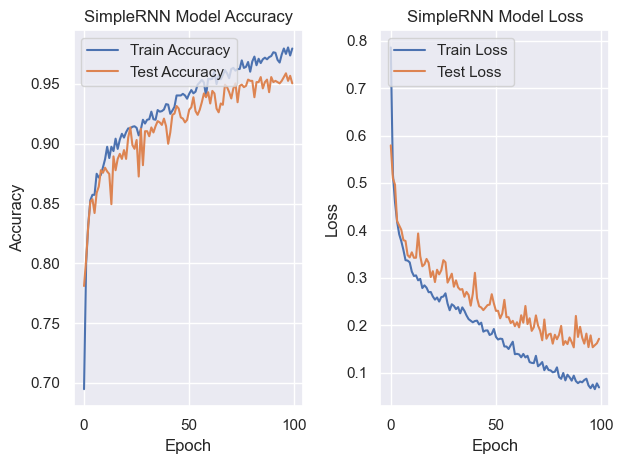

In [80]:
plt.subplot(1, 2, 1)
plt.plot(history_rnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_rnn.history['val_accuracy'], label='Test Accuracy')
plt.title('SimpleRNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_rnn.history['loss'], label='Train Loss')
plt.plot(history_rnn.history['val_loss'], label='Test Loss')
plt.title('SimpleRNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

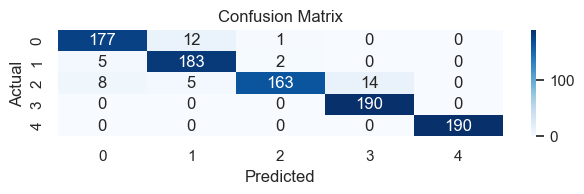

In [81]:
plt.subplot(3, 1, 3)
cm = confusion_matrix(y_test, y_pred_rnn_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

# Model Comparison

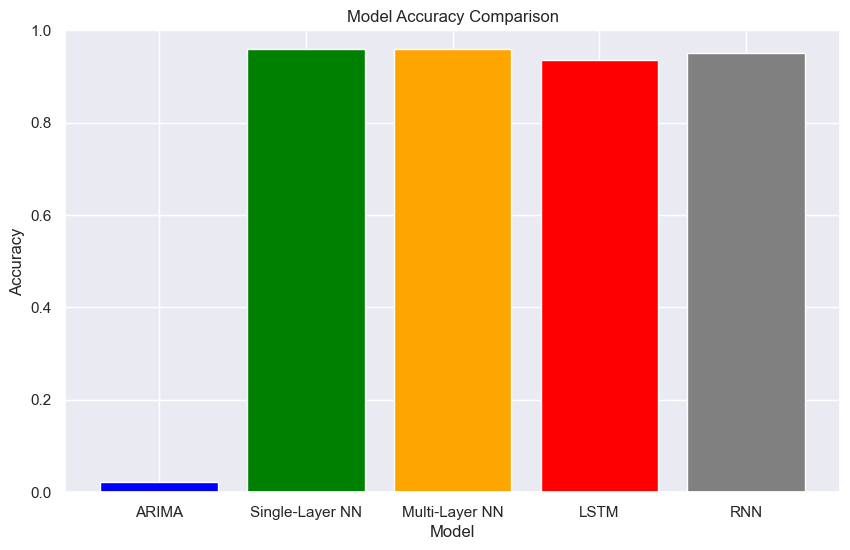

             Model  Accuracy
2   Multi-Layer NN  0.960000
1  Single-Layer NN  0.958947
4              RNN  0.950526
3             LSTM  0.935789
0            ARIMA  0.022117


In [82]:
models = ['ARIMA', 'Single-Layer NN', 'Multi-Layer NN', 'LSTM' , 'RNN']
accuracies = [arima_accuracy, single_layer_accuracy, multi_layer_accuracy, lstm_accuracy, rnn_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red', 'gray'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

accuracies_df = pd.DataFrame({'Model': models, 'Accuracy': accuracies})
accuracies_df = accuracies_df.sort_values(by='Accuracy', ascending=False)
print(accuracies_df)

# TESTING

In [83]:
future_forecast = arima_model_fit.forecast(steps=10)

print(f'Future forecast: {future_forecast}')

Future forecast: 2532    1.0
2533    1.0
2534    1.0
2535    1.0
2536    1.0
2537    1.0
2538    1.0
2539    1.0
2540    1.0
2541    1.0
Name: predicted_mean, dtype: float64


In [84]:
new_data = np.array([[1.4, 5.373, 0.1, 5.3, 0.2, 0.07, 3.666667, 0.0, 1.0]])

In [85]:
# kategori cuaca
label_mapping = {
    0: 'drizzle',
    1: 'fog',
    2: 'rain',
    3: 'snow',
    4: 'sun'
}

ARIMA PREDICT


SINGLE LAYER PREDICT

In [86]:
prediction = single_layer_model.predict(new_data)

predicted_class = np.argmax(prediction, axis=-1)

print(f'Predicted weather category: {label_mapping[predicted_class[0]]}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted weather category: rain


MULTI LAYER PREDICT

In [87]:
prediction = multi_layer_model.predict(new_data)

predicted_class = np.argmax(prediction, axis=-1)

print(f'Predicted weather category: {label_mapping[predicted_class[0]]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted weather category: rain


LSTM PREDICT

In [88]:
new_data_lstm = new_data.reshape((new_data.shape[0], 1, new_data.shape[1]))

prediction = lstm_model.predict(new_data_lstm)

predicted_category = np.argmax(prediction, axis=-1)
print(f'Predicted weather category: {label_mapping[predicted_class[0]]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Predicted weather category: rain


RNN PREDICT

In [89]:
new_data_rnn = new_data.reshape((new_data.shape[0], 1, new_data.shape[1]))

prediction = rnn_model.predict(new_data_rnn)

predicted_category = np.argmax(prediction, axis=-1)
print(f'Predicted weather category: {label_mapping[predicted_class[0]]}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted weather category: rain
